predicted labels are  [0, 1, 2, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 2, 0, 1, 0, 1, 2, 2, 0, 1, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1]
actual labels are  [0, 1, 2, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 2, 0, 1, 0, 1, 2, 2, 0, 1, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1]
Confusion matrix, without normalization
[[14  0  0]
 [ 0 13  0]
 [ 0  0 10]]
predicted labels are  [2, 0, 1, 0, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 2, 2, 0, 0, 1, 2, 2, 2, 1, 0, 2, 0, 1, 2, 1, 1, 1, 2, 0, 0, 2, 0, 0]
actual labels are  [2, 0, 1, 0, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 2, 2, 0, 0, 1, 2, 2, 2, 0, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 0, 2, 0, 0]
Confusion matrix, without normalization
[[13  1  0]
 [ 1  9  0]
 [ 0  0 13]]
predicted labels are  [1, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1, 2, 0, 0, 1, 1, 2, 2, 0, 1, 1, 1, 2, 1, 2]
actual labels are  [1, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1, 2, 0, 0, 1, 1, 2, 2, 0, 1, 1, 1, 2, 1, 2]
Confusion matrix, without normalization
[[ 8  1  0]

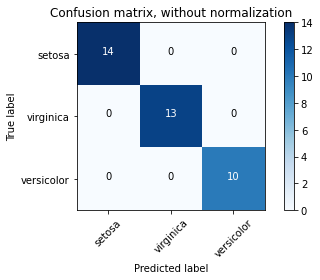

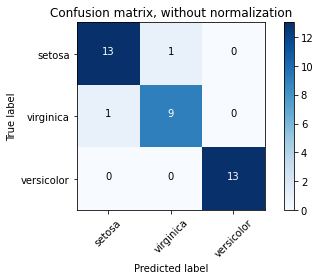

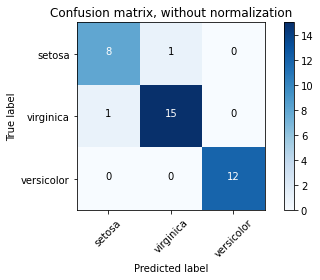

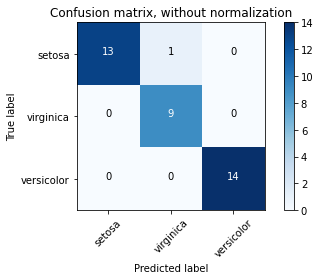

In [1]:
import numpy as np
from csv import reader
from random import seed
from random import randrange
from math import sqrt
from math import exp
from math import pi
import random 
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt




# function for plot confusion matrix with actual_l and predicted_l calculated by me
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()












# Load a CSV Iris data
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

# Convert string column to float (for make it possible work with data and labels)
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

# Convert string column to integer (for make it possible work with data and labels)
def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
    for row in dataset:
        row[column] = lookup[row[column]]
    return lookup

random.seed(datetime.now())
filename = 'iris.csv'
dataset = load_csv(filename)

for i in range(len(dataset[0])-1):
    str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)


def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for _ in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split







# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

predicted_l=[]
actual_l=[]

# algorithm function to work with fold and calculate accuracy and actual and predicted lables each time and plot confusion matrix with
#themm.....
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    global predicted_l
    global actual_l
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        predicted_l=predicted
        print("predicted labels are ",predicted_l)
        actual = [row[-1] for row in fold]
        actual_l=actual
        print("actual labels are ",actual_l)
        y_predicted=pd.Series(predicted_l,name="predicted")
        y_actual=pd.Series(actual_l,name="actual")
        df_confusion=pd.crosstab(y_predicted,y_actual)
        x=df_confusion.to_numpy()
        cnf_matrix = x
        np.set_printoptions(precision=2)

        # Plot non-normalized confusion matrix
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=['setosa', 'virginica', 'versicolor'],
                      title='Confusion matrix, without normalization')
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores


# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
    separated = dict()
    for i in range(len(dataset)):
        vector = dataset[i]
        class_value = vector[-1]
        if (class_value not in separated):
            separated[class_value] = list()
        separated[class_value].append(vector)
    return separated
 
# Calculate the mean of a list of numbers
def mean(numbers):
    return sum(numbers)/float(len(numbers))
 
# Calculate the standard deviation of a list of numbers
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
    return sqrt(variance)
 
# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
    summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
    del(summaries[-1])
    return summaries
 
# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
    separated = separate_by_class(dataset)
    summaries = dict()
    for class_value, rows in separated.items():
        summaries[class_value] = summarize_dataset(rows)
    return summaries
 
# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
    exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
    return (1 / (sqrt(2 * pi) * stdev)) * exponent
 
# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
    total_rows = sum([summaries[label][0][2] for label in summaries])
    probabilities = dict()
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
        for i in range(len(class_summaries)):
            mean, stdev, _ = class_summaries[i]
            probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
    return probabilities
 
# Predict the class for a given row
def predict(summaries, row):
    probabilities = calculate_class_probabilities(summaries, row)
    best_label, best_prob = None, -1
    for class_value, probability in probabilities.items():
        if best_label is None or probability > best_prob:
            best_prob = probability
            best_label = class_value
    return best_label
 
# Naive Bayes 
def naive_bayes(train, test):
    summarize = summarize_by_class(train)
    predictions = list()
    for row in test:
        output = predict(summarize, row)
        predictions.append(output)
    return(predictions)



n_folds = 4
scores = evaluate_algorithm(dataset, naive_bayes, n_folds)

print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))






    
